# **Titanic Data**    
This data is based on the shipwreck of the titanic.    
I'm going to analyze the data on those who survived and those who didn't.      
The purpose of this analysis is to answer the question "What sort of people are more likely to survive the shipwreck? and to build a model to predict whether a person is going to survive based on the variables given.   
The data was gotten from kaggle through this link https://www.kaggle.com/competitions/titanic/code


**This notebook is divided into 4 sections, each constituting a workflow of its own**     
1. Initial Data Analysis and Preprocessing     
2. EDA    
3. Modelling
4. Predictions  

## **Cummulative Work Flow**   
1. Import libraries and data    
2. Data Inspection 
3. EDA       
     i. Data Cleaning     
     ii. Data Visualization and Manipulation     
     iii. Feature Engineering        
     iv. Hypothesis testing      
4. Modelling
5. Model Evaluation




### **IMPORT LIBRARIES**

Import all the required libraries that would be used

In [67]:

#Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
%matplotlib inline

### **DATA INSPECTION**    
I am going to import the data and preform some basic actions on it so as to understand the data better

In [68]:

#import the data
df = pd.read_csv('train.csv')
df1=pd.read_csv('test.csv')

In [69]:

#Check the first 5 rows of the data
df.head( )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
# Check the first 5 rows of the test data 
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
#Check the number of rows and columns
df.shape

(891, 12)

In [72]:
#Check the number of rows and columns in the test data
df1.shape

(418, 11)

In [73]:
#Check the statistical information about columns in the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
#Check the statistical information about columns in the test data
df1.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [75]:
#Check the names of columns in the data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# **EXPLORATORY DATA ANALYSIS (EDA)**

### **DATA CLEANING**   
I am going to move on to data cleanng as the data might be dirty and contain some null or duplicate data

In [76]:
#check the number of null values in each columns
df.isna().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
#check the number of null values in each columns of the test data
df1.isna().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [78]:
#Check the number of duplicate data input 

df.duplicated().sum()

0

In [79]:
#Check the number of duplicate data input in the test data
df.duplicated().sum()

0

There are 0 duplicate data.   
The dataset is discovered to have three columns with empty rows in both data.For the train data, the age, Embarked and Cabin columns have empty. While for the test data, the fare, Age and Cabin columns have empty inputs. But some of the columns with null values may be irrelevant to the analysis, so I am going to drop them.   

In [80]:
#I'm going to start with the Age column
data=[df, df1]
for dataset in data:
    mean = df['Age'].mean()
    std = df1['Age'].std()
    isnull=dataset['Age'].isnull().sum()
    randage=np.random.randint(mean-std, mean+std, size=isnull)
    
    ageslice = dataset['Age'].copy()
    ageslice[np.isnan(ageslice)]=randage
    dataset['Age'] = ageslice
    dataset['Age']=df['Age'].astype(int)

In [81]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
df1.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [83]:
df.Embarked.value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [84]:
#since the S class has the highest occurence, I am going to fill the empty rows with S
df['Embarked'].fillna('S', inplace=True) 

In [85]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [86]:
#check the data of the passenger with an empty data for his fare
df1[df1['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,55,0,0,3701,NaN,NaN,S


In [87]:
#Usng the mean of fare for Pclass 3 to replace the null value
d=df1[df1['Pclass']==3]
print(d['Fare'].mean())
df1['Fare'].fillna(d['Fare'].mean(), inplace=True)

12.459677880184334


In [88]:
df1.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [89]:
#I am going to drop the columns that won't be useful for my analysis
df=df.drop('Cabin', axis = 1)
df1=df1.drop('Cabin', axis = 1)
df=df.drop('Ticket', axis=1)
df1=df1.drop('Ticket', axis=1)
df=df.drop('PassengerId', axis=1)
df1=df1.drop('PassengerId', axis=1)
df=df.drop('Name', axis=1)
df1=df1.drop('Name', axis=1)

In [90]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [91]:
df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,0,0,7.8292,Q
1,3,female,38,1,0,7.0000,S
2,2,male,26,0,0,9.6875,Q
3,3,male,35,0,0,8.6625,S
4,3,female,35,1,1,12.2875,S


### **DATA VISUALIZATION AND MANIPULATION**    


In [92]:
#Check the count of the categories in the  Embarked column  
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [93]:
#Check the count of the categories in the Survived column
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

c:\Users\opaku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

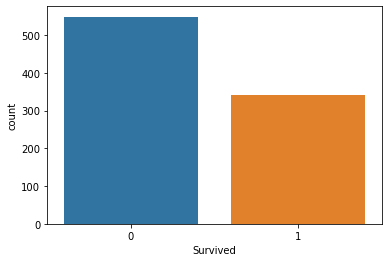

In [94]:
#plot a bar chart to display the count  of the Survived column
sns.countplot('Survived', data=df)

In [95]:
#Subset the data to only inputs with people that survived
survived_people=df[df['Survived']==1]

<AxesSubplot:title={'center':'Fares paid by those who survived and those who died'}, xlabel='Survived', ylabel='Fare'>

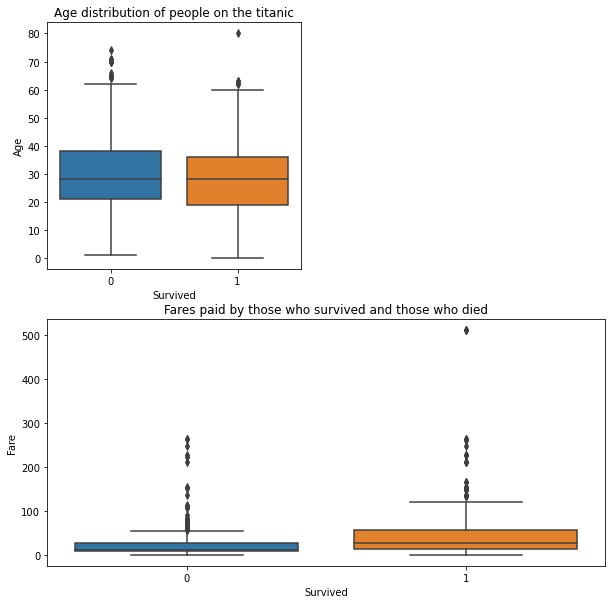

In [96]:
#Plot the age and fare distribution of those that survived and those who didn't
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.title('Age distribution of people on the titanic')
sns.boxplot(x='Survived', y='Age', data=df)
plt.subplot(2,1,2)
plt.title('Fares paid by those who survived and those who died')
sns.boxplot(x='Survived', y='Fare', data=df)

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

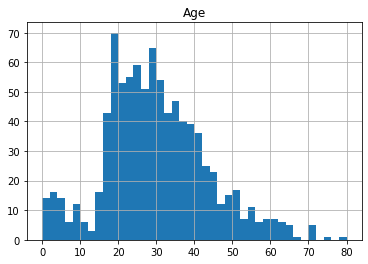

In [97]:


#the age distribution of the data
df.hist("Age", bins=40)

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

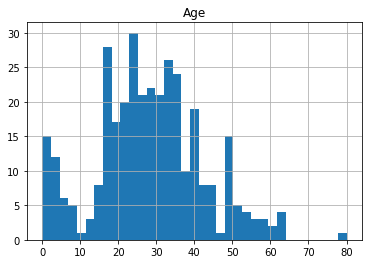

In [98]:
#The age distribution of those who survived
persons_survived=df[df['Survived']==1]
persons_survived.hist("Age", bins=35)

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

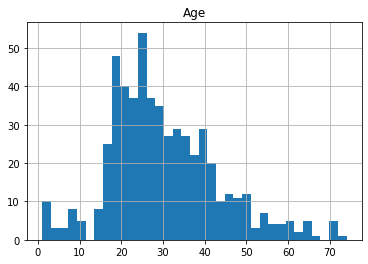

In [99]:
#The age distribution of those who didn't survive
persons_that_died=df[df['Survived']==0]
persons_that_died.hist("Age", bins=35)

The age distribution of thse who survived and those that didn't is really similar. But a minor difference is seen in the age range of between 1 and 10. the people within that range that survived is higher that the people who didn't 

**Insight**     
 1. Although there are some outliers, the range of the fare paid by those who survived is larger than those who did not. Therefore,  we can deduce that the hgher your fee, the higher your survival rate. But there are other factor that can affect it.     
 2. The age range of those who survived and those who died are really close, so it dosen't affect the survival of a person that much. But the age range of those who survived is a little bit smaller than those who didn't.

In [100]:
#Check the count of the SibSp column
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [101]:
#Check the count of SibSp for those who survived
persons_survived.SibSp.value_counts()

0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

In [102]:

people_that_died=df[df["Survived"]==0]
people_that_died.SibSp.value_counts()

0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

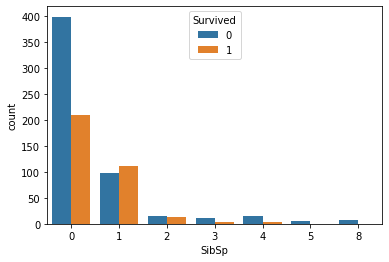

In [103]:
sns.countplot(data=df , x='SibSp', hue='Survived')

There is a similarity in the plot as there is a reduction in the number of people that suvived as the number of SibSp increases and the no. of people who died also reduces with number of SibSp they had. But a difference between both comes after the number of SibSp gets to 5 as there is no one who had more than 4 SibSp that survived. Finally the people with 1 SibSp have a little bit higher chance of surviving


In [104]:
#Check the count of the Pclass
persons_survived.Pclass.value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [105]:

#check the pclass count for those that died
people_that_died.Pclass.value_counts()

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [106]:
#Check the pclass count for those that survived
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

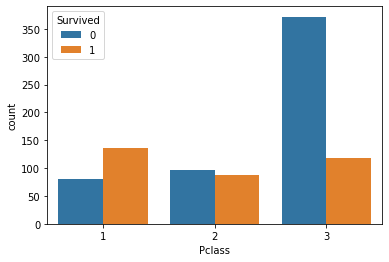

In [107]:
#Plot the Count of Pclass
sns.countplot(x='Pclass', hue = 'Survived', data=df)

The number of people in Pclass 1 that survived is more than that of the other classes. But I noticed that the fare paid by Pclass 1 is way higher than those of other class. And also the probability of someone in Pclass 3 surviving is lower than that of other class. While those n pclass 2 have an almost equal chance of surviving or dying

In [108]:
#Check the count by Sex of people 
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

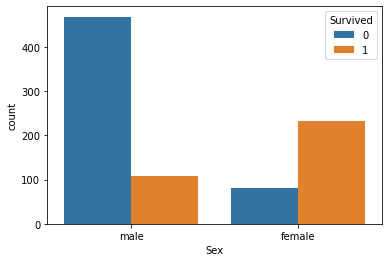

In [109]:
#plot the barplot of count
sns.countplot(x='Sex',hue='Survived', data=df)

In [110]:
#count of Parch on the titanic
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

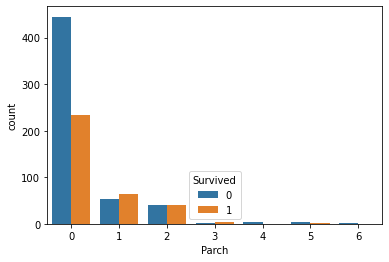

In [111]:
#Countplot of the Parch
sns.countplot(x='Parch',hue='Survived', data=df)




While people with 0 Parch(Parents and children) had the highest number of people that survived, those with 1 , 2, 3 have a higher chance at survival, as their ratio of people that survived to those that didn't is almost equal. While those with 4 and 6 parch didn't survive. 

<AxesSubplot:xlabel='Embarked', ylabel='count'>

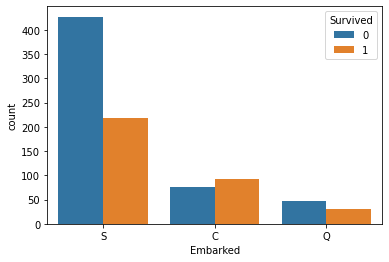

In [112]:
sns.countplot(x='Embarked',hue='Survived', data=df)

In [113]:
persons_survived[persons_survived['Embarked']=='S'].Sex.value_counts()

female    142
male       77
Name: Sex, dtype: int64

In [114]:
df[df['Embarked']=='S'].Sex.value_counts()

male      441
female    205
Name: Sex, dtype: int64

Those that embarked at port C have a higher chance of surviving than those who boarded in other ports. While the survival rate of those that boarded at port S is lower than the others, they have the highest number of those who survived, which means that other factors could have made tham survive. And as seen from the previous cells, majority of those who survived are females, which means that the sex variable can affect it   

In [187]:
df['Embarked'].replace('S',1, inplace=True)
df1['Embarked'].replace('S',1, inplace=True)
df['Embarked'].replace('C',2, inplace=True)
df1['Embarked'].replace('C',1, inplace=True)
df['Embarked'].replace('Q',3, inplace=True)
df1['Embarked'].replace('Q',3, inplace=True)

In [190]:
#I am starting with the Sex column
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df.iloc[:,2]=labelencoder.fit_transform(df.iloc[:,2])
df1.iloc[:,1]=labelencoder.fit_transform(df1.iloc[:,1])

In [191]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,1
1,1,1,0,38,1,0,71.2833,2
2,1,3,0,26,0,0,7.9250,1
3,1,1,0,35,1,0,53.1000,1
4,0,3,1,35,0,0,8.0500,1


In [192]:
df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,0,0,7.8292,3
1,3,0,38,1,0,7.0000,1
2,2,1,26,0,0,9.6875,3
3,3,1,35,0,0,8.6625,1
4,3,0,35,1,1,12.2875,1


Now that I'm done with data exploration, I'll move on to modelling 

## **MODELLING**

In [118]:
col=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [119]:
x=df[col]

In [120]:
y=df.iloc[:,0]

In [121]:
#convert the y values into an array
y = np.ravel(y)

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [163]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0, max_iter=1000)
logreg.fit(x_train, y_train)
print("Accuracy of logistic regression on training set: {:.3f}".format(logreg.score(X_train, y_train)))

Accuracy of logistic regression on training set: 0.804


In [164]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("Accuracy of Decision tree on training set: {:.3f}".format(tree.score(X_train, y_train)))

Accuracy of Decision tree on training set: 0.987


In [165]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(random_state=0, n_estimators=10)
forest.fit(x_train, y_train)
print("Accuracy of random forest classifier on training set: {:.3f}".format(tree.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.987


### **PREDICTIONS**

In [171]:
logistic=logreg.predict(x_test)
print(logistic)


[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1]


In [194]:
logreg.predict(df1)

[array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 

In [195]:
from sklearn import metrics
print (metrics.accuracy_score(y_test, logistic))

0.8026905829596412


In [196]:
Tree=tree.predict(x_test)
print(Tree)

[1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0
 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1
 0]


In [199]:
tree.predict(df1)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [197]:
from sklearn import metrics
print (metrics.accuracy_score(y_test, Tree))

0.7623318385650224


In [177]:
Forest=forest.predict(x_test)
print(Forest)

[1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1]


In [198]:
forest.predict(df1)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [185]:
from sklearn import metrics
print (metrics.accuracy_score(y_test, Forest))

0.8251121076233184
